In [47]:
import pandas as pd
import matplotlib.pylab as plt

In [68]:
llibres = pd.read_pickle('llibres.pkl')
casos = pd.read_pickle('casos.pkl')

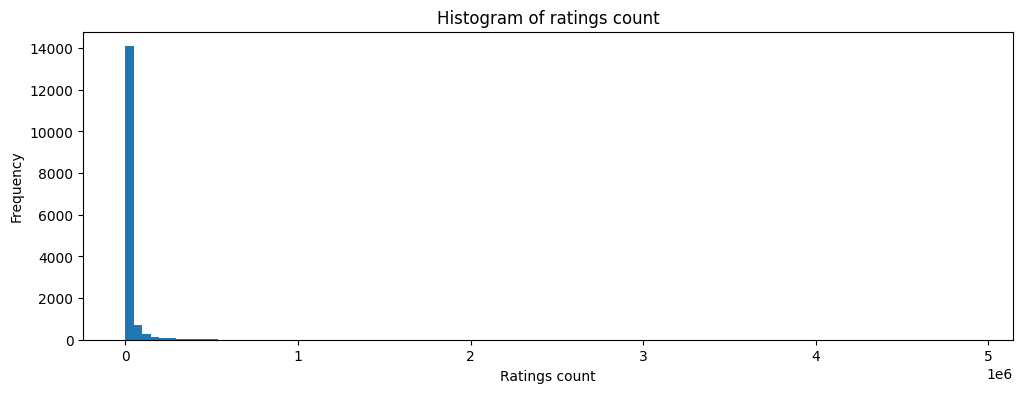

In [49]:
# Save hist of ratings_count
plt.figure(figsize=(12,4))
plt.hist(llibres['ratings_count'], bins=100)
plt.xlabel('Ratings count')
plt.ylabel('Frequency')
plt.title('Histogram of ratings count')
plt.savefig('../plots/hist_ratings_count.png')

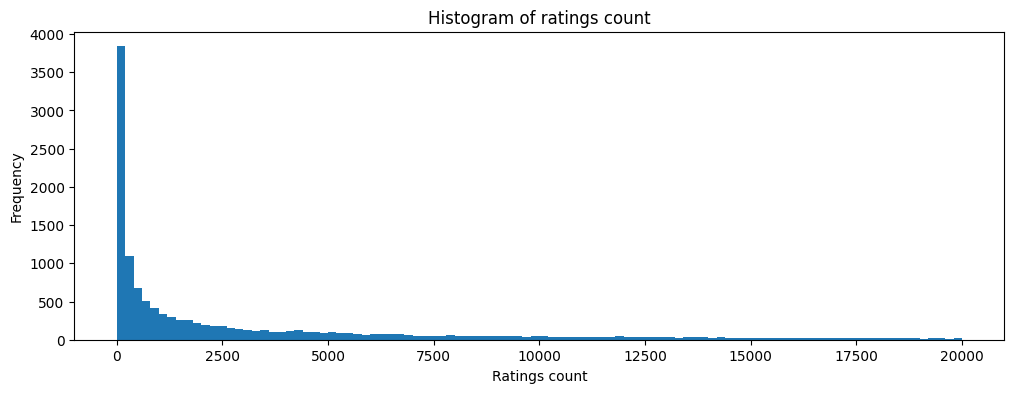

In [50]:
# Save hist of ratings_count limted to 20000
plt.figure(figsize=(12,4))
plt.hist(llibres['ratings_count'], bins=100, range=(0, 20000))
plt.xlabel('Ratings count')
plt.ylabel('Frequency')
plt.title('Histogram of ratings count')
plt.savefig('../plots/hist_ratings_count_limited_20000.png')

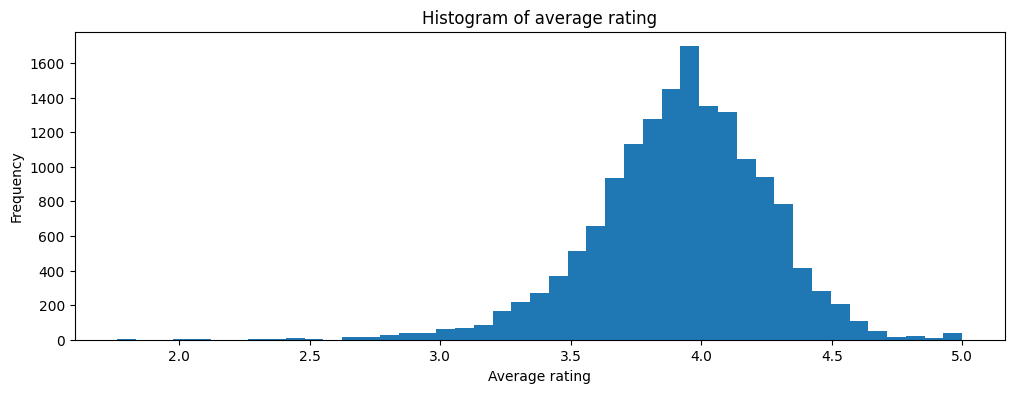

In [51]:
# Save hist average_rating
plt.figure(figsize=(12,4))
plt.hist(llibres['average_rating'], bins=45)
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Histogram of average rating')
plt.savefig('../plots/hist_average_rating.png')

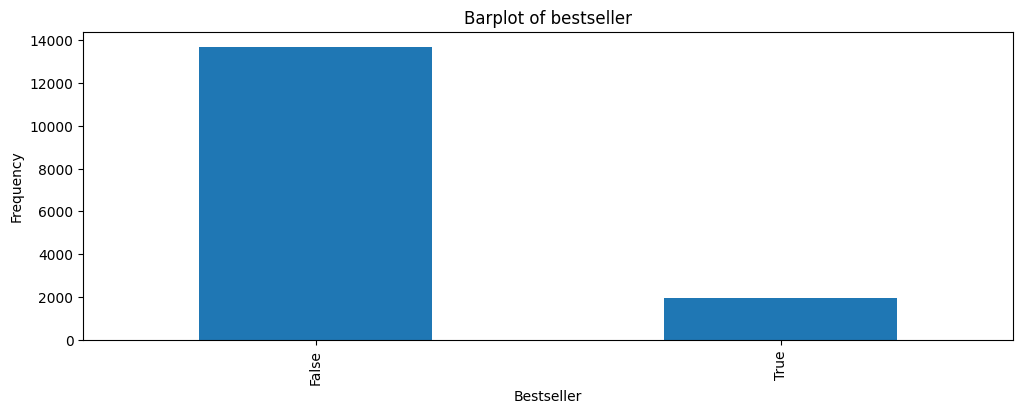

In [52]:
# Barplot bestseller or not
plt.figure(figsize=(12,4))
llibres['bestseller'].value_counts().plot(kind='bar')
plt.xlabel('Bestseller')
plt.ylabel('Frequency')
plt.title('Barplot of bestseller')
plt.savefig('../plots/barplot_bestseller.png')

In [53]:
# Get % of bestsellers
print(llibres['bestseller'].value_counts())
bestsellers = llibres['bestseller'].value_counts()
bestsellers = bestsellers/bestsellers.sum()*100
print()
print('Percentage of bestsellers: {:.2f}%'.format(bestsellers[1]))
print('Percentage of non-bestsellers: {:.2f}%'.format(bestsellers[0]))

bestseller
False    13703
True      1963
Name: count, dtype: int64

Percentage of bestsellers: 12.53%
Percentage of non-bestsellers: 87.47%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


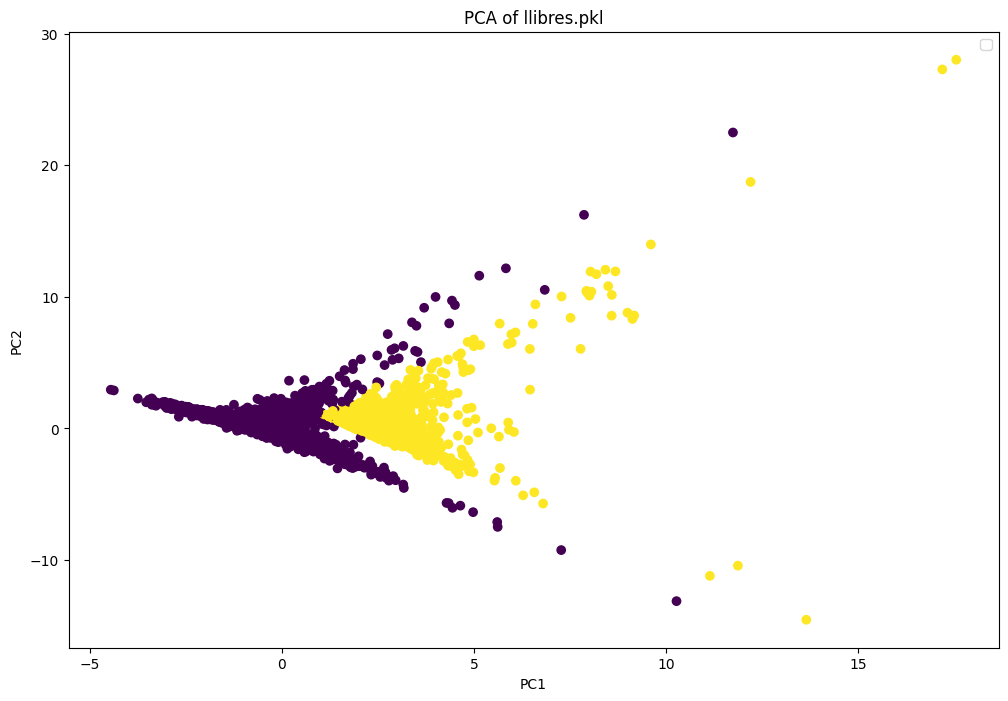

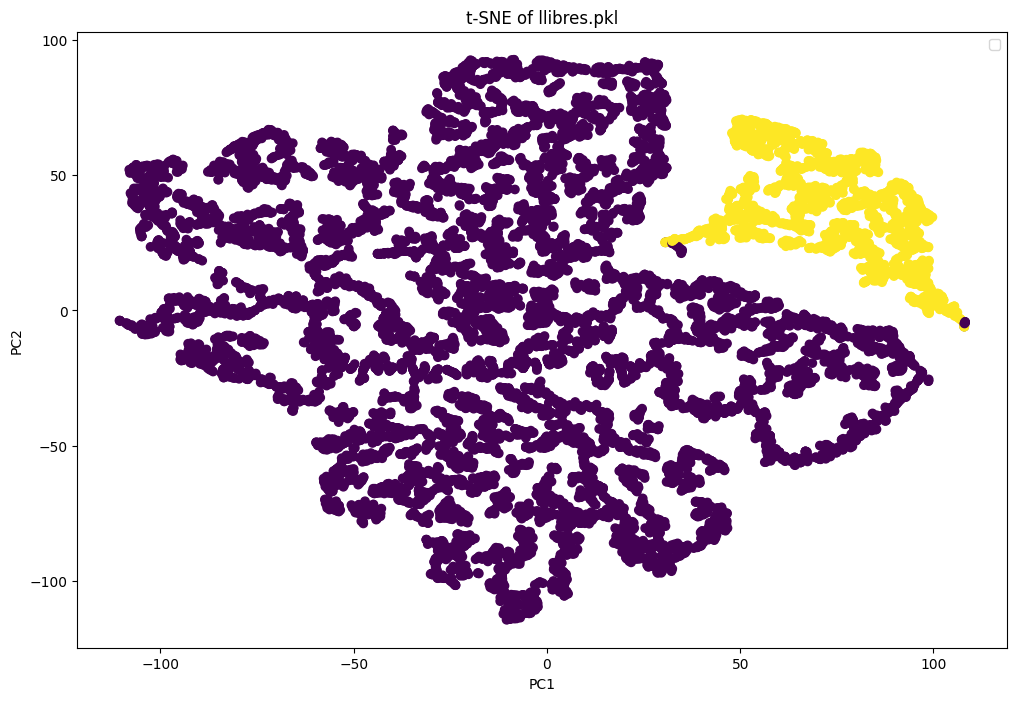

In [55]:
# Plot llibres.pkl cluster with a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
x = llibres[['ratings_count', 'average_rating', 'num_pages', 'bestseller']]
x = StandardScaler().fit_transform(x)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, llibres[['bestseller']]], axis=1)

# Plot
plt.figure(figsize=(12,8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['bestseller'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of llibres.pkl')
plt.legend()
plt.savefig('../plots/pca_llibres.png')

# Plot llibres.pkl cluster with a t-SNE
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2)
tsneComponents = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data=tsneComponents, columns=['PC1', 'PC2'])
tsneDf = pd.concat([tsneDf, llibres[['bestseller']]], axis=1)

# Plot
plt.figure(figsize=(12,8))
plt.scatter(tsneDf['PC1'], tsneDf['PC2'], c=tsneDf['bestseller'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('t-SNE of llibres.pkl')
plt.legend()
plt.savefig('../plots/tsne_llibres.png')

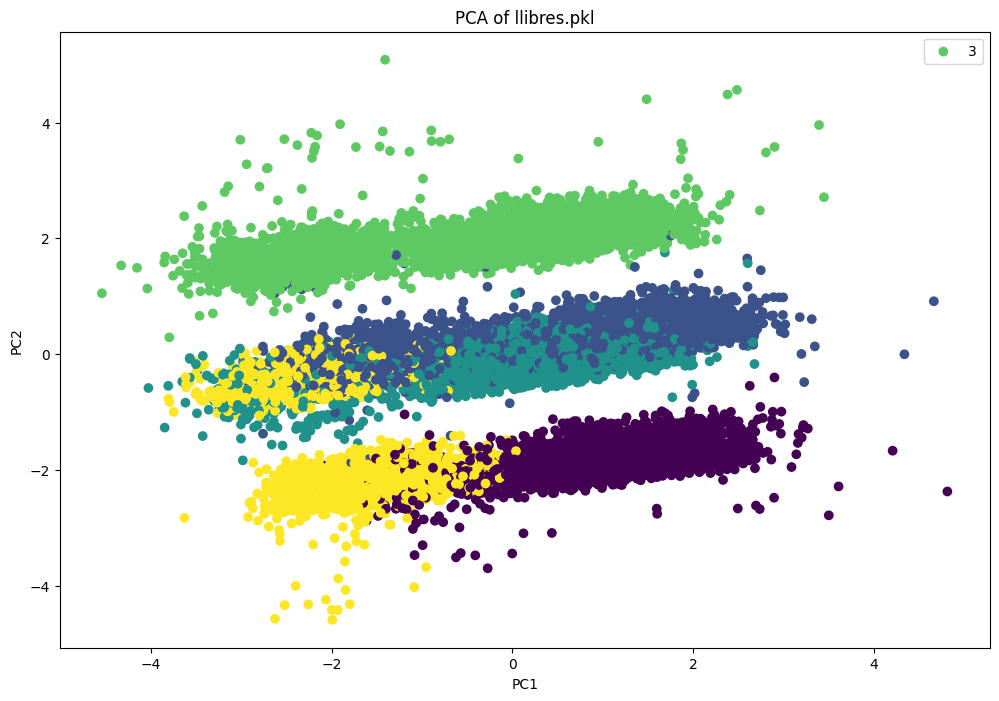

In [77]:
# Coger el vector de libros y hacer un df con cada componente en una columna
df_vector = pd.DataFrame(llibres['vector'].tolist())
# Coger la información de a que cluster pertenece cada libro
df_cluster = pd.DataFrame(llibres['cluster'].tolist())

# Standardize data
df_vector = StandardScaler().fit_transform(df_vector)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_vector)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df_cluster], axis=1)

# Plot
plt.figure(figsize=(12,8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf[0], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of llibres.pkl')
plt.legend(finalDf[0].unique())
plt.savefig('../plots/pca_llibres_cluster.png')